[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.1.4 Stündliche Primär-Energie und Treibhausgas-Emissionen

In [26]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [28]:
%matplotlib inline
import sys
sys.path.append("..\\")
sys.path
from FLUCCOplus.notebooks import *
import FLUCCOplus.electricitymap as elmap
import FLUCCOplus.conversion_factors as conversion

In [29]:
em = elmap.fetch_common().rename(columns={a: b for a, b in zip(elmap.pcs, elmap.SOURCES)}, inplace=False)[elmap.SOURCES]
em


,biomass,hydro,solar,wind,geothermal,coal,gas,nuclear,oil,unknown,battery_discharge,hydro_discharge
datetime,,,,,,,,,,,,
2015-01-01 00:00:00+00:00,458.978941,1395.092302,0.007834,470.125145,0.323146,1779.487592,822.339497,1140.124407,40.767615,482.022001,0.0,16.481521
2015-01-01 01:00:00+00:00,443.831453,1267.718904,0.017926,467.085219,0.319514,1689.546071,664.066702,1134.451966,40.438080,479.978696,0.0,17.295469
2015-01-01 02:00:00+00:00,433.990259,1194.695333,0.009358,474.533958,0.323014,1560.145476,614.026376,1077.533961,41.056407,421.923329,0.0,0.012529
2015-01-01 03:00:00+00:00,429.802029,1223.516679,0.000961,486.656888,0.329711,1485.545259,589.683849,1039.160298,41.277124,390.527200,0.0,0.000000
2015-01-01 04:00:00+00:00,434.734636,1219.485328,0.001146,502.425468,0.338643,1434.766908,592.131767,1077.552626,42.049861,453.763620,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,297.010418,2203.494088,0.000450,1467.690056,0.012752,529.465305,1724.610213,236.881850,3.476181,51.631556,NaN,521.977130
2019-12-31 20:00:00+00:00,313.281308,1930.057597,0.000558,1562.480117,0.026639,559.374103,1579.852098,268.588811,5.632769,52.347259,NaN,275.358741
2019-12-31 21:00:00+00:00,326.681690,1906.474431,0.000366,1661.476572,0.030509,598.331478,1508.148087,295.068386,6.304218,55.435488,NaN,169.798776


In [30]:
# map([print(i) for i in conversion.CONVERSION_FACTORS.keys()])

In [31]:
conversion.conversion_mapping

{'biomass': 'Heizkraftwerk Holz',
 'hydro': 'Wasserkraft',
 'solar': 'Fotovoltaik',
 'wind': 'Windkraft',
 'geothermal': 'Heizkraftwerk Geothermie',
 'coal': 'Braunkohlekraftwerk (Dampf)',
 'gas': 'Erdgaskombikraftwerk GuD',
 'nuclear': 'Atomkraftwerk',
 'oil': 'Blockheizkraftwerk Diesel',
 'unknown': 'ENTSO-E-Mix',
 'battery_discharge': 'ENTSO-E-Mix',
 'hydro_discharge': 'OIB RL-E 19 Liefermix'}

In [32]:
conversion.conversion_columns


['Primärenergiefaktor total [MJ-eq]',
 'Primärenergiefaktor fossil [MJ-eq]',
 'Primärenergiefaktor nuklear  [MJ-eq]',
 'Primärenergiefaktor total erneuerbar [MJ-eq]',
 'Primärenergiefaktor Abwärme / Abfall [MJ-eq]',
 'CO2-Äquivalente  [kg CO2-eq]']

c:\Users\Simon Schneider\Code\FLUCCOplus\notebooks\..\FLUCCOplus\electricitymap.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[src] = df[src] * factors.CONVERSION_FACTORS[src_mapping][type]
c:\Users\Simon Schneider\Code\FLUCCOplus\notebooks\..\FLUCCOplus\electricitymap.py:413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_consumption_avg"] = df.sum(axis=1)


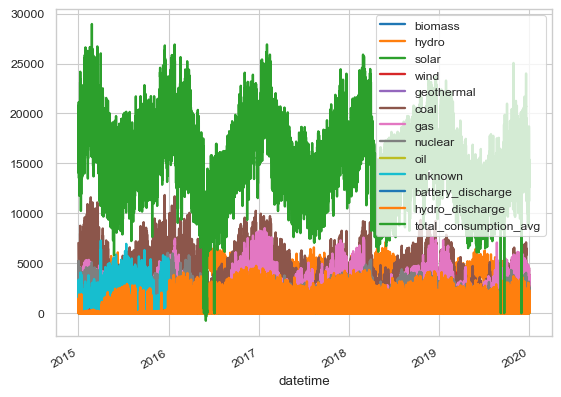

In [33]:
em = elmap.fetch_common();
em.rename(columns={a: b for a, b in zip(elmap.pcs, elmap.SOURCES)}, inplace=True);

PE = elmap.primary_energy(em[elmap.SOURCES])

PE.plot();

In [34]:

faktoren = conversion.CONVERSION_FACTORS


In [35]:
header = conversion.conversion_columns
PE_teile = header[1:4]

In [36]:
f = pd.DataFrame(faktoren).transpose()
f

,Primärenergiefaktor total [MJ-eq],Primärenergiefaktor fossil [MJ-eq],Primärenergiefaktor nuklear [MJ-eq],Primärenergiefaktor total erneuerbar [MJ-eq],Primärenergiefaktor Abwärme / Abfall [MJ-eq],CO2-Äquivalente [kg CO2-eq],"Kohlendioxid, fossil [kg CO2-eq]",Umweltbelastungspunkte [UBP'13]
Atomkraftwerk,4.21,0.06,4.14,0.01,0.00,0.006,0.005,125.8
Erdgaskombikraftwerk GuD,2.22,2.21,0.01,0.01,0.00,0.129,0.121,85.6
Braunkohlekraftwerk (Dampf),3.95,3.90,0.03,0.01,0.00,0.377,0.370,220.2
Steinkohlekraftwerk (Dampf),3.94,3.87,0.04,0.03,0.00,0.344,0.298,213.4
Kraftwerk Schweröl,3.83,3.78,0.04,0.01,0.00,0.281,0.268,302.5
Kehrichtverbrennung,0.02,0.01,0.00,0.00,1.11,0.002,0.001,8.9
Heizkraftwerk Holz,3.88,0.19,0.05,3.64,0.00,0.033,0.012,81.9
Blockheizkraftwerk Diesel,3.28,3.23,0.04,0.01,0.00,0.229,0.215,187.9
Blockheizkraftwerk Gas,2.94,2.92,0.01,0.01,0.00,0.186,0.159,122.3
Blockheizkraftwerk Biogas,0.91,0.50,0.32,0.09,1.11,0.112,0.032,103.8


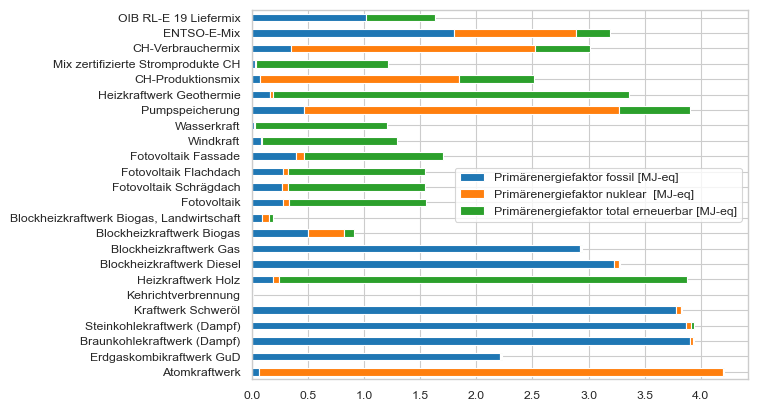

In [37]:
f[PE_teile].plot(kind="barh", stacked=True);


c:\Users\Simon Schneider\Code\FLUCCOplus\notebooks\..\FLUCCOplus\electricitymap.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[src] = df[src] * factors.CONVERSION_FACTORS[src_mapping][type]
c:\Users\Simon Schneider\Code\FLUCCOplus\notebooks\..\FLUCCOplus\electricitymap.py:413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_consumption_avg"] = df.sum(axis=1)


<Axes: xlabel='datetime'>

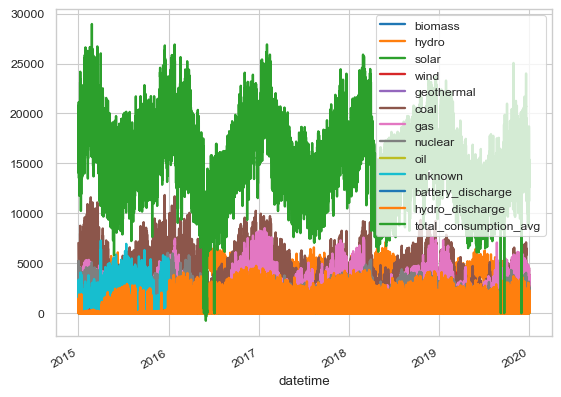

In [38]:
em = elmap.fetch_common();
em.rename(columns={a: b for a, b in zip(elmap.pcs, elmap.SOURCES)}, inplace=True);

PE = elmap.primary_energy(em[elmap.SOURCES])
#PE.drop(["total_consumption_avg"], axis=1, inplace=True)

PE.plot()

In [39]:
hourly_PEfactor = PE["total_consumption_avg"] / em["total_consumption_avg"]

In [40]:
avg_factors = hourly_PEfactor.resample("Y").mean()

<Axes: ylabel='datetime'>

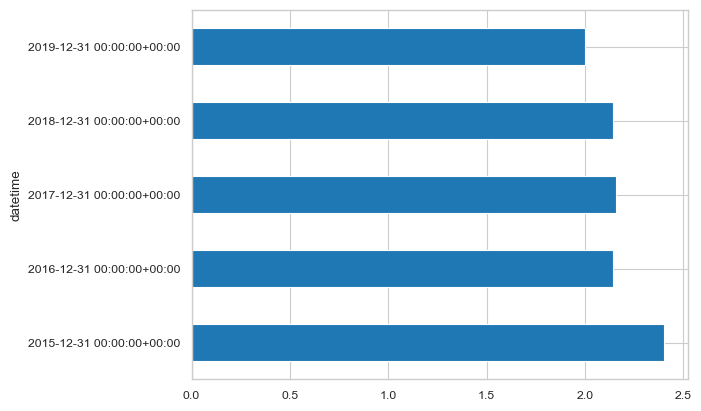

In [41]:
avg_factors.plot(kind="barh")

<Axes: ylabel='datetime'>

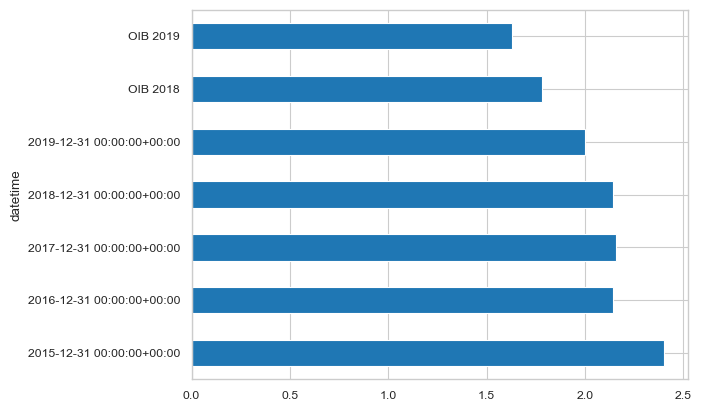

In [42]:
avg_factors["OIB 2018"] = 1.78
avg_factors["OIB 2019"] = 1.63
avg_factors.plot(kind="barh")

In [43]:
fPEs = elmap.pe_factors(PE).drop(columns=["fPE"])

c:\Users\Simon Schneider\Code\FLUCCOplus\notebooks\..\FLUCCOplus\electricitymap.py:412: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[src] = df[src] * factors.CONVERSION_FACTORS[src_mapping][type]
c:\Users\Simon Schneider\Code\FLUCCOplus\notebooks\..\FLUCCOplus\electricitymap.py:413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_consumption_avg"] = df.sum(axis=1)
c:\Users\Simon Schneider\Code\FLUCCOplus\notebooks\..\FLUCCOplus\electricitymap.py:412: SettingWithCopyWarning: 
A value is trying to

In [44]:
fPEs.columns

Index(['fPE,n.ern.', 'fPE,ern.', 'fPE,nukl.', 'fPE,abw.'], dtype='object')

In [45]:
fPEs.mean()

fPE,n.ern.    0.949020
fPE,ern.      0.880733
fPE,nukl.     0.339044
fPE,abw.      0.000000
dtype: float64

Text(0.5, 0, 'Primärenergie-Konversionsfaktor $f_{PE}$ [-]')

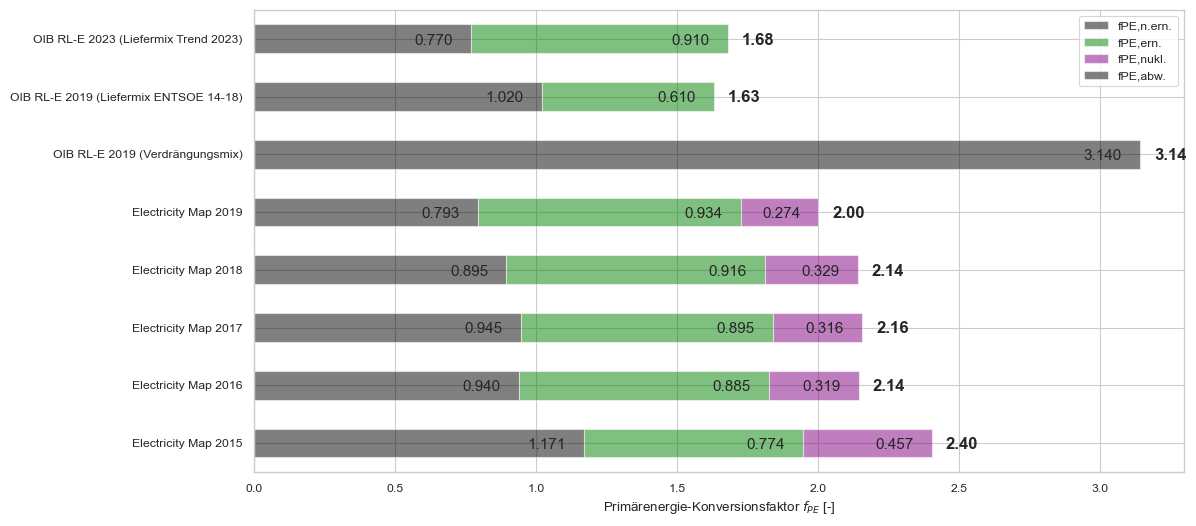

In [168]:
annuals = fPEs.resample("Y").mean()
annuals.index = [f"Electricity Map {i+2015}" for i in range(5)]
annuals.loc["OIB RL-E 2019 (Verdrängungsmix)"] = [3.14, 0, 0, 0]
annuals.loc["OIB RL-E 2019 (Liefermix ENTSOE 14-18)"] = [1.02, 0.61, 0, 0]
annuals.loc["OIB RL-E 2023 (Liefermix Trend 2023)"] = [0.77, 0.91, 0, 0]

fig, ax = plt.subplots(1,1, figsize=(12,6))

annuals.plot(ax=ax,kind="barh", stacked=True, 
             color=["black", "green", "purple"], alpha=0.5,
)
for i, (index, row) in enumerate(annuals.iterrows()):
    fpenern = row["fPE,n.ern."]
    fpeern = row["fPE,ern."]
    fpenukl = row["fPE,nukl."]
    ax.annotate(f"{f'{fpenern:,.2f}'.replace(',',' ')}", (fpenern-0.2, i-0.1), fontsize=11)
    if fpeern:
        ax.annotate(f"{f'{fpeern:,.2f}'.replace(',',' ')}", (fpeern+fpenern-0.2, i-0.1), fontsize=11)
    if fpenukl: #if not zero
        ax.annotate(f"{f'{fpenukl:,.2f}'.replace(',',' ')}", (fpenukl+fpeern+fpenern-0.2, i-0.1), fontsize=11)
    ax.annotate(f"{f'{fpenukl+fpeern+fpenern:,.2f}'.replace(',',' ')}", (fpenukl+fpeern+fpenern+0.05, i-0.1), fontsize=12, fontweight="bold")
    
plt.xlabel(r"Primärenergie-Konversionsfaktor $f_{PE}$ [-]")


In [47]:
avg_factors = hourly_PEfactor.resample("Y").mean()

<Axes: ylabel='datetime'>

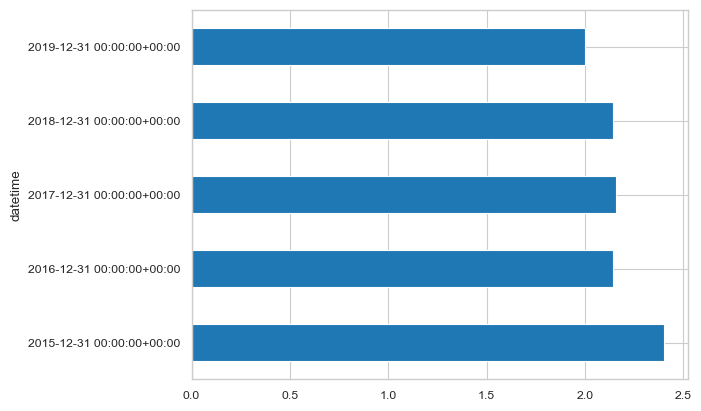

In [48]:
avg_factors.plot(kind="barh")

<Axes: ylabel='datetime'>

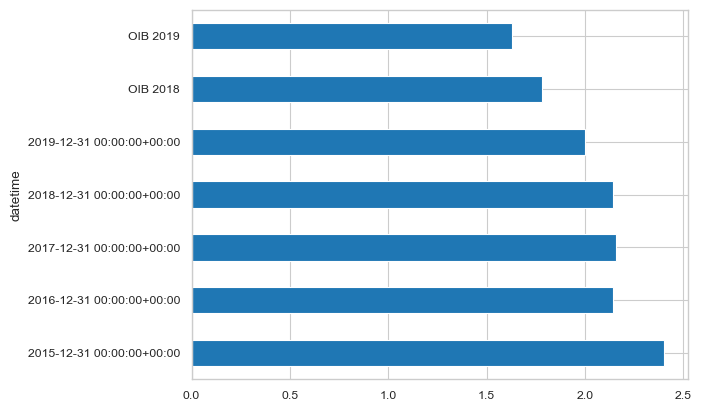

In [49]:
avg_factors["OIB 2018"] = 1.78
avg_factors["OIB 2019"] = 1.63
avg_factors.plot(kind="barh")

In [50]:
fPEs.to_csv(DATA_INTERIM / "fPEs_15-19.csv",
          sep=";",
          decimal=",",
          encoding="cp850")

C:\Users\Simon Schneider\AppData\Local\Temp\ipykernel_42200\2284460642.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


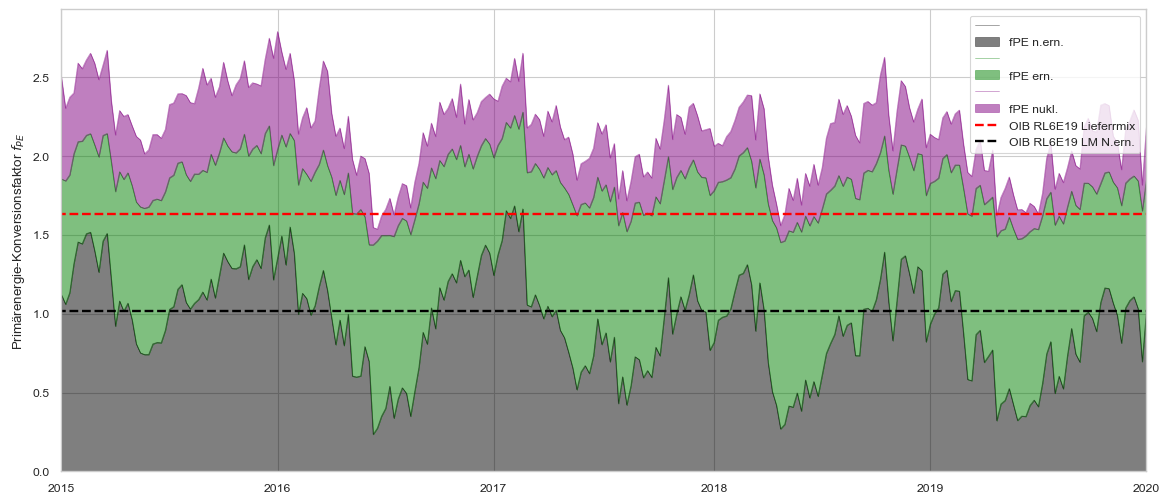

In [122]:
a = elmap.read_interim("fPEs_15-19.csv")
fig, ax = plt.subplots(1,1, figsize=(14,6))
a.drop(["fPE,abw."], axis=1).resample("W").mean().plot(
    ax=ax,
    kind="area", 
    stacked=True,
    color=["black", "green", "purple"], 
    alpha=0.5,
    linewidth=0.5, legend=["n.ern","ern", "asdasd"])
fig.show()
ax.plot(1.63*np.ones(8760*5),"r--")
ax.plot(1.02*np.ones(8760*5),"--", color="black")
plt.ylabel(r"Primärenergie-Konversionsfaktor $f_{PE}$")
plt.xlabel(r"")
ax.legend(["","fPE n.ern.","","fPE ern.","","fPE nukl.","OIB RL6E19 Lieferrmix", "OIB RL6E19 LM N.ern."], loc="upper right")